In [20]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import datetime
import time
import six
%matplotlib inline

In [2]:
# Load in csv
bitcoin_tweets_df = pd.read_csv("./Resources/df_Final.csv", sep=';')
bitcoin_tweets_df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,"
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,0,"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,"219605.16,,"
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,"386739.15,,"
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,"408360.03,,"
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,"637045.88,,"


In [3]:
# get end of day price and tweet count
end_price = bitcoin_tweets_df[bitcoin_tweets_df['Date'].str.contains('23:00:00')] # change to 00:00:00 - will remove one day - df needs to be same dimension
end_price['Close']

# remove ',,' and ',0,' from volume in dollars column
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',,', ' ')
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',0,', ' ')

In [4]:
# split date column by date and time
bitcoin_tweets_df[['Date', 'Time']] = bitcoin_tweets_df['Date'].str.split(' ', expand=True)

In [5]:
# get end of day closing price 
end_of_day = bitcoin_tweets_df[bitcoin_tweets_df['Time'].str.contains('23:00:00')]

In [11]:
# get total volume of negative, positive, and neutral tweets
total_negative = bitcoin_tweets_df.groupby('Date')['Count_Negatives'].sum()
total_positive = bitcoin_tweets_df.groupby('Date')['Count_Positives'].sum()
total_neutral = bitcoin_tweets_df.groupby('Date')['Count_Neutrals'].sum()

# get closing price
close_price = end_of_day.set_index('Date')['Close']

# get total volume of tweets - incl. positive, negative, and neutral
tweet_vol = bitcoin_tweets_df.groupby('Date')['Total Volume of Tweets'].sum()

# get dates for the period of dataset
date = bitcoin_tweets_df['Date'].unique()

# create dict for new df
tweets_dict = {'Closing Price': close_price, 
               'Positive Tweets': total_positive, 
               'Negative Tweets': total_negative, 
               'Neutral Tweets': total_neutral, 
               'Total Volume of Tweets': tweet_vol}

# create df
tweets_df = pd.DataFrame(tweets_dict)
tweets_df.head()

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets
Date,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.0
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.0
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.0
2017-08-04,2855.00,4150.0,2703.0,7959.0,21863.0
2017-08-05,3263.62,6258.0,2115.0,8731.0,22123.0


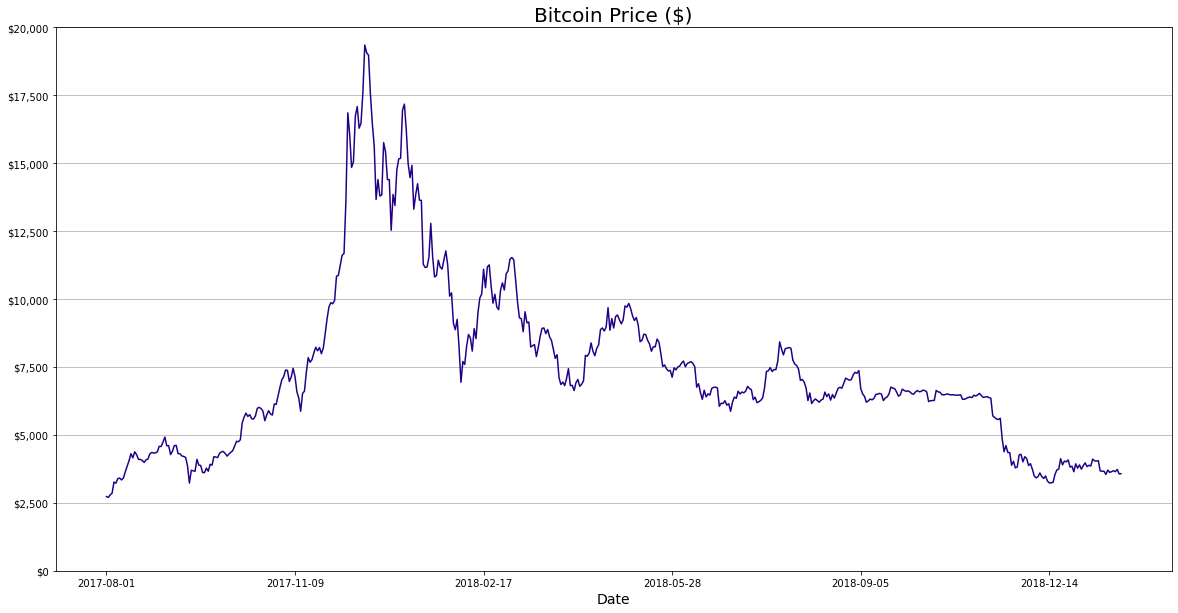

In [22]:
# Bitcoin price changes over the period in the given dataset 
ax = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
# set x axis label and graph title
plt.title('Bitcoin Price ($)', fontdict = {'fontsize': 20})
ax.set_xlabel('Date', c='black', fontsize=14)

# set y axis format and limit
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.ylim(0, max(tweets_df['Closing Price']) * 1.034)

# add gridlines to graph
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
# save the plot as a file
plt.savefig('bitcoin_price.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

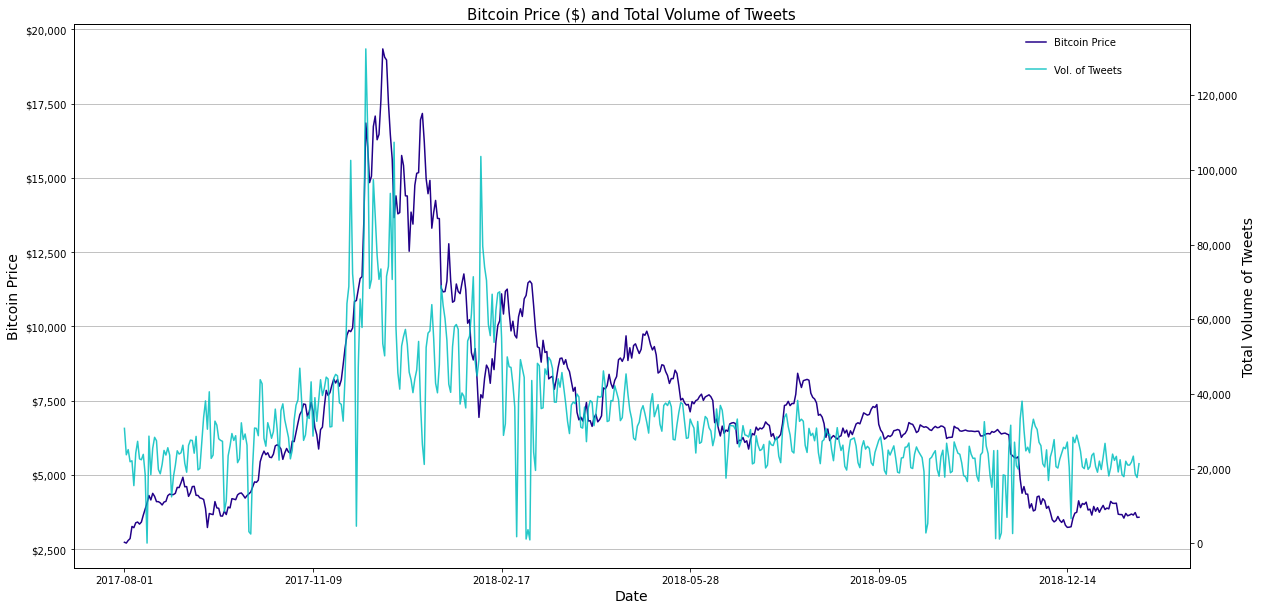

In [74]:
# Bitcoin price and Total volume of tweets
# plot BTC pirce - add title to graph
ax1 = tweets_df['Closing Price'].plot(label='Bitcoin Price', color='#208', figsize=(20, 10))
plt.title('Bitcoin Price ($) and Total Volume of Tweets', fontdict = {'fontsize': 15})

# format BTC y axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax1.yaxis.set_major_formatter(tick)

# add horizontal gridlines
ax1.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
plt.legend()

# add 2nd y axis - plot total vol. of tweets - set 2nd y axis label
ax2 = ax1.twinx()
ax2 = tweets_df['Total Volume of Tweets'].plot(secondary_y=True, label='Vol. of Tweets', c='c', alpha=.85)
ax2.set_ylabel('Total Volume of Tweets', color='black', fontsize=14)

# format 2nd y axis
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax2.yaxis.set_major_formatter(tick2)
plt.legend()

# set legend location
ax1.legend(loc=(.85, .95), frameon=False)
ax2.legend(loc=(.85, .9), frameon=False)

# set x axis label
ax1.set_xlabel('Date', c='black', fontsize=14)

# save the plot as a file
plt.savefig('btc_price_total_tweets.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

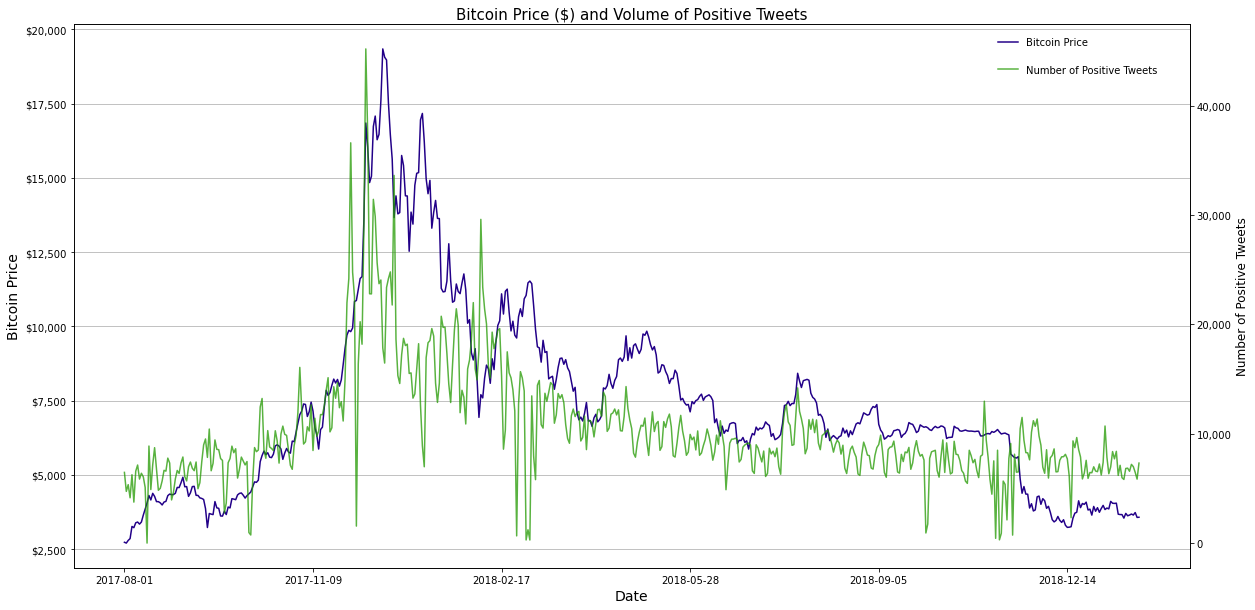

In [46]:
# Bitcoin price and Total Volume of Positive tweets
# plot BTC price - add title to graph
ax3 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($) and Volume of Positive Tweets', fontdict = {'fontsize': 15})

# format BTC y axis - set y axis label
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax3.yaxis.set_major_formatter(tick)

# add horizontal gridlines 
ax3.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
plt.legend()

# add 2nd y axis - plot positive tweets - set y axis label
ax4 = ax3.twinx()
ax4 = tweets_df['Positive Tweets'].plot(label='Vol. of Positive Tweets', c='#290', alpha=.75)
ax4.set_ylabel('Number of Positive Tweets', c='black', fontsize=12)

# format 2nd y axis
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax4.yaxis.set_major_formatter(tick2)
plt.legend()

# set legend location
ax3.legend(loc=(.825, .95), frameon=False)
ax4.legend(loc=(.825, .9), frameon=False)

# set x axis label
ax3.set_xlabel('Date', c='black', fontsize=14)

# save the plot as a file
plt.savefig('btc_price_positive_tweets.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

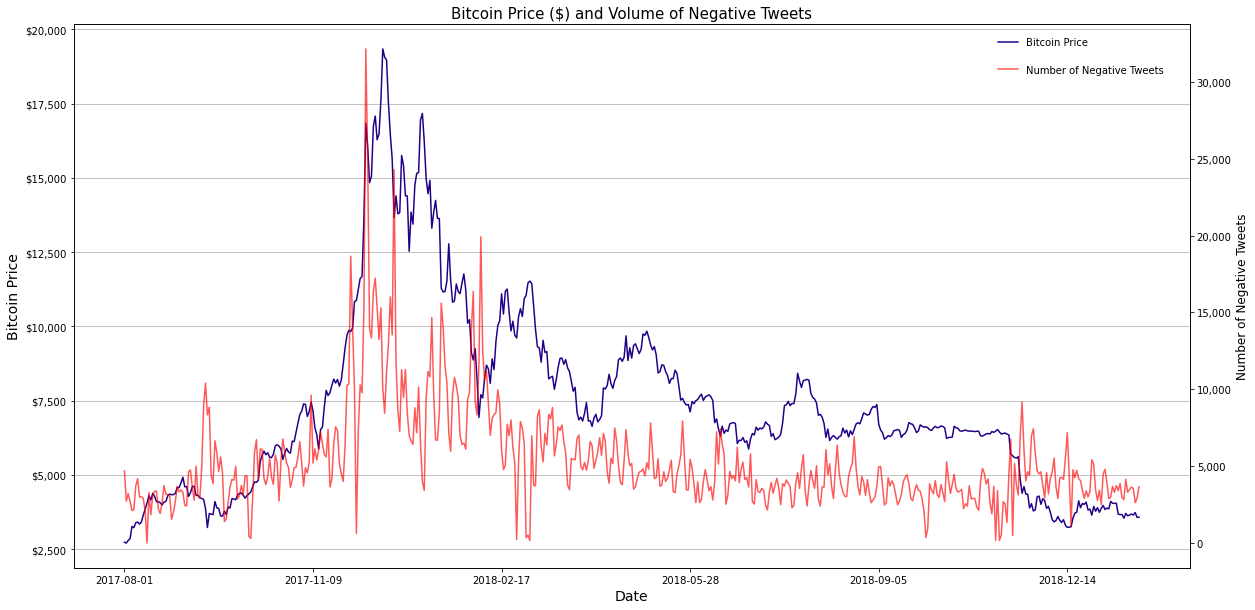

In [47]:
# Bitcoin price and Total Volume of Negative tweets

# plot bitcoin price - add title to graph
ax5 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($) and Volume of Negative Tweets', fontdict = {'fontsize': 15})

# format BTc y axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax5.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax5.yaxis.set_major_formatter(tick)

# add grid to graph
ax5.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
plt.legend()

# add 2nd y axis
ax6 = ax5.twinx()

# plot negative tweets - set y axis label
ax6 = tweets_df['Negative Tweets'].plot(label='Vol. of Negative Tweets', c='r', alpha=.65)
ax6.set_ylabel('Number of Negative Tweets', c='black', fontsize=12)

# format y axis
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax6.yaxis.set_major_formatter(tick2)
plt.legend()

# set legend location
ax5.legend(loc=(.825, .95), frameon=False)
ax6.legend(loc=(.825, .9), frameon=False)

# set x axis label
ax5.set_xlabel('Date', c='black', fontsize=14)


# save the plot as a file
plt.savefig('btc_price_negative_tweets.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

In [ ]:
# Bitcoin price and Total Volume of Neutral tweets
# plot bitcoin price - add title to graph
ax7 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($) and Volume of Neutral Tweets', fontdict = {'fontsize': 15})

# format BTC y axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax7.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax7.yaxis.set_major_formatter(tick)

# set grid for graph
ax7.grid(b=True, which='major', color='grey', linestyle='-', alpha=.6, axis='y')
plt.legend()

# add second y axis
ax8 = ax7.twinx()

# plot neutral tweets and set y label
ax8 = tweets_df['Neutral Tweets'].plot.bar(label='Vol. of Neutral Tweets', color='orange', alpha=.85)
ax8.set_ylabel('Number of Neutral Tweets', c='black', fontsize=12)

# format y axis
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax8.yaxis.set_major_formatter(tick2)
plt.legend()

# set legend location
ax7.legend(loc=(.825, .95), frameon=False)
ax8.legend(loc=(.825, .9), frameon=False)

# set x axis label
ax7.set_xlabel('Date', c='black', fontsize=14)

# save the plot as a file
plt.savefig('btc_price_neutral_tweets.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

In [50]:
# correlation - BTC price and Vol. of positive, negative, neutral, total tweets
neutral_corr = tweets_df['Neutral Tweets'].corr(tweets_df['Closing Price'])
positive_corr = tweets_df['Positive Tweets'].corr(tweets_df['Closing Price'])
negative_corr = tweets_df['Negative Tweets'].corr(tweets_df['Closing Price'])
total_corr = tweets_df['Total Volume of Tweets'].corr(tweets_df['Closing Price'])

# create df for correlation
corr_df = pd.DataFrame.from_records([{'': 'Correlation', 'Neutral Tweets': neutral_corr, 
                                      'Positive Tweets': positive_corr, 'Negative Tweets': negative_corr, 
                                      'All Tweets': total_corr}], index='Neutral Tweets')

# format df
pd.options.display.float_format = '{:,.5f}'.format
corr_df.reset_index().set_index('')

,Neutral Tweets,Positive Tweets,Negative Tweets,All Tweets
,,,,
Correlation,0.61599,0.69473,0.60921,0.66415


In [278]:
# reset index for new df
new_tweets_df = tweets_df.reset_index()

# get list of closing price - set list to series
price_change_list = new_tweets_df['Closing Price'].tolist()
price_change_series = pd.Series(price_change_list)

# get BTC daily % price change
percent_change = price_change_series.pct_change()

# set % change series to list
percent_change_list = percent_change.tolist()

In [279]:
# add percent change column to df
tweets_df['Percent Change'] = percent_change_list
tweets_df.head()

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets,Percent Change
Date,,,,,,
2017-08-01,"2,731.00000","6,471.00000","4,701.00000","12,089.00000","30,802.00000",NaN
2017-08-02,"2,703.51000","4,734.00000","2,732.00000","9,063.00000","23,726.00000",-0.01007
2017-08-03,"2,793.37000","5,351.00000","3,233.00000","9,806.00000","25,111.00000",0.03324
2017-08-04,"2,855.00000","4,150.00000","2,703.00000","7,959.00000","21,863.00000",0.02206
2017-08-05,"3,263.62000","6,258.00000","2,115.00000","8,731.00000","22,123.00000",0.14312


In [291]:
# price change % correlation
per_neutral_corr = tweets_df['Neutral Tweets'].corr(tweets_df['Percent Change'])
per_positive_corr = tweets_df['Positive Tweets'].corr(tweets_df['Percent Change'])
per_negative_corr = tweets_df['Negative Tweets'].corr(tweets_df['Percent Change'])
per_total_corr = tweets_df['Total Volume of Tweets'].corr(tweets_df['Percent Change'])

# create BTC pirce change %
percent_corr_df = pd.DataFrame.from_records([{'': 'Correlation', 'Neutral Tweets': per_neutral_corr, 
                                      'Positive Tweets': per_positive_corr, 'Negative Tweets': per_negative_corr, 
                                      'All Tweets': per_total_corr}], index='Neutral Tweets')

# format df
pd.options.display.float_format = '{:,.5f}'.format
percent_corr_df.reset_index().set_index('')

,Neutral Tweets,Positive Tweets,Negative Tweets,All Tweets
,,,,
Correlation,0.12640,0.08776,0.00926,0.07690
